In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
import torchvision.transforms as transforms

# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [4]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [7]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [8]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [9]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [10]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [11]:
import torch.nn.functional as F

In [12]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [13]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.0980023741722107, 'val_loss': 2.3267810344696045}

In [14]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9611, val_acc: 0.6333
Epoch [1], val_loss: 1.6898, val_acc: 0.7283
Epoch [2], val_loss: 1.4875, val_acc: 0.7612
Epoch [3], val_loss: 1.3349, val_acc: 0.7802
Epoch [4], val_loss: 1.2178, val_acc: 0.7933


In [15]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1259, val_acc: 0.8039
Epoch [1], val_loss: 1.0522, val_acc: 0.8108
Epoch [2], val_loss: 0.9920, val_acc: 0.8170
Epoch [3], val_loss: 0.9419, val_acc: 0.8232
Epoch [4], val_loss: 0.8995, val_acc: 0.8273


In [16]:
history3 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8956, val_acc: 0.8275
Epoch [1], val_loss: 0.8918, val_acc: 0.8284
Epoch [2], val_loss: 0.8881, val_acc: 0.8290
Epoch [3], val_loss: 0.8844, val_acc: 0.8293
Epoch [4], val_loss: 0.8807, val_acc: 0.8296


In [17]:
history3 = fit(5, 0.0005, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8633, val_acc: 0.8319
Epoch [1], val_loss: 0.8471, val_acc: 0.8324
Epoch [2], val_loss: 0.8319, val_acc: 0.8329
Epoch [3], val_loss: 0.8178, val_acc: 0.8342
Epoch [4], val_loss: 0.8045, val_acc: 0.8344


In [18]:
history4 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8019, val_acc: 0.8346
Epoch [1], val_loss: 0.7994, val_acc: 0.8351
Epoch [2], val_loss: 0.7969, val_acc: 0.8353
Epoch [3], val_loss: 0.7944, val_acc: 0.8357
Epoch [4], val_loss: 0.7920, val_acc: 0.8359


In [19]:
history5 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7896, val_acc: 0.8360
Epoch [1], val_loss: 0.7872, val_acc: 0.8362
Epoch [2], val_loss: 0.7849, val_acc: 0.8365
Epoch [3], val_loss: 0.7825, val_acc: 0.8370
Epoch [4], val_loss: 0.7802, val_acc: 0.8375


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

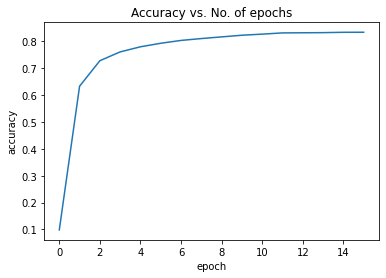

In [21]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [22]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [26]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Label: 7 , Predicted: 7


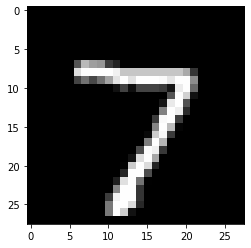

In [27]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [28]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 2 , Predicted: 8


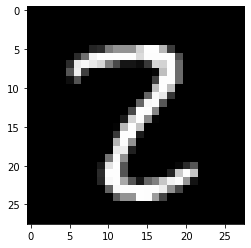

In [29]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [30]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8446289300918579, 'val_loss': 0.7450833320617676}

In [57]:
torch.save(model.state_dict(), 'drive/MyDrive/jovian/lesson_3/models/mnist-logistic.pth')